## Ram Pressure

Ram pressure calculation method adopted from Simpson et al. (2018)

In [1]:
import os # set tangos environment variable before loading tangos so we know where the data is
os.environ['TANGOS_DB_CONNECTION'] = '/home/akinshol/Data/Timescales/TangosData/h329.db'
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import matplotlib as mpl
import pynbody
import tangos
from bulk import *
    
%matplotlib inline
#mpl.rcParams['font.monospace'] = 'Terminal'
mpl.rc('font',**{'family':'serif','monospace':['Palatino']})
mpl.rc('text', usetex=True)
mpl.rcParams.update({'font.size': 9})

pynbody.config['halo-class-priority'] =  [pynbody.halo.ahf.AHFCatalogue,
                                          pynbody.halo.GrpCatalogue,
                                          pynbody.halo.AmigaGrpCatalogue,
                                          pynbody.halo.legacy.RockstarIntermediateCatalogue,
                                          pynbody.halo.rockstar.RockstarCatalogue,
                                          pynbody.halo.subfind.SubfindCatalogue,
                                          pynbody.halo.hop.HOPCatalogue]

In [2]:
path= '/home/christenc/Data/Sims/h329.cosmo50PLK.3072g/h329.cosmo50PLK.3072gst5HbwK1BH/snapshots/'
snapshots = ['h329.cosmo50PLK.3072gst5HbwK1BH.004096', 
             'h329.cosmo50PLK.3072gst5HbwK1BH.004032', 
             'h329.cosmo50PLK.3072gst5HbwK1BH.003936', 
             'h329.cosmo50PLK.3072gst5HbwK1BH.003840', 
             'h329.cosmo50PLK.3072gst5HbwK1BH.003744', 
             'h329.cosmo50PLK.3072gst5HbwK1BH.003648', 
             'h329.cosmo50PLK.3072gst5HbwK1BH.003606', 
             'h329.cosmo50PLK.3072gst5HbwK1BH.003552', 
             'h329.cosmo50PLK.3072gst5HbwK1BH.003456', 
             'h329.cosmo50PLK.3072gst5HbwK1BH.003360', 
             'h329.cosmo50PLK.3072gst5HbwK1BH.003264', 
             'h329.cosmo50PLK.3072gst5HbwK1BH.003195', 
             'h329.cosmo50PLK.3072gst5HbwK1BH.003168', 
             'h329.cosmo50PLK.3072gst5HbwK1BH.003072',
             'h329.cosmo50PLK.3072gst5HbwK1BH.002976', 
             'h329.cosmo50PLK.3072gst5HbwK1BH.002880', 
             'h329.cosmo50PLK.3072gst5HbwK1BH.002784', 
             'h329.cosmo50PLK.3072gst5HbwK1BH.002688', 
             'h329.cosmo50PLK.3072gst5HbwK1BH.002592', 
             'h329.cosmo50PLK.3072gst5HbwK1BH.002554', 
             'h329.cosmo50PLK.3072gst5HbwK1BH.002496', 
             'h329.cosmo50PLK.3072gst5HbwK1BH.002400', 
             'h329.cosmo50PLK.3072gst5HbwK1BH.002304',
             'h329.cosmo50PLK.3072gst5HbwK1BH.002208', 
             'h329.cosmo50PLK.3072gst5HbwK1BH.002112', 
             'h329.cosmo50PLK.3072gst5HbwK1BH.002088', 
             'h329.cosmo50PLK.3072gst5HbwK1BH.002016', 
             'h329.cosmo50PLK.3072gst5HbwK1BH.001920', 
             'h329.cosmo50PLK.3072gst5HbwK1BH.001824',
             'h329.cosmo50PLK.3072gst5HbwK1BH.001740',
             'h329.cosmo50PLK.3072gst5HbwK1BH.001728',
             'h329.cosmo50PLK.3072gst5HbwK1BH.001632', 
             'h329.cosmo50PLK.3072gst5HbwK1BH.001536', 
             'h329.cosmo50PLK.3072gst5HbwK1BH.001475', 
             'h329.cosmo50PLK.3072gst5HbwK1BH.001440', 
             'h329.cosmo50PLK.3072gst5HbwK1BH.001344', 
             'h329.cosmo50PLK.3072gst5HbwK1BH.001269', 
             'h329.cosmo50PLK.3072gst5HbwK1BH.001248',
             'h329.cosmo50PLK.3072gst5HbwK1BH.001152', 
             'h329.cosmo50PLK.3072gst5HbwK1BH.001106', 
             'h329.cosmo50PLK.3072gst5HbwK1BH.001056', 
             'h329.cosmo50PLK.3072gst5HbwK1BH.000974', 
             'h329.cosmo50PLK.3072gst5HbwK1BH.000960',
             'h329.cosmo50PLK.3072gst5HbwK1BH.000864', 
             'h329.cosmo50PLK.3072gst5HbwK1BH.000776', 
             'h329.cosmo50PLK.3072gst5HbwK1BH.000768', 
             'h329.cosmo50PLK.3072gst5HbwK1BH.000672', 
             'h329.cosmo50PLK.3072gst5HbwK1BH.000637', 
             'h329.cosmo50PLK.3072gst5HbwK1BH.000576', 
             'h329.cosmo50PLK.3072gst5HbwK1BH.000480', 
             'h329.cosmo50PLK.3072gst5HbwK1BH.000456', 
             'h329.cosmo50PLK.3072gst5HbwK1BH.000384', 
             'h329.cosmo50PLK.3072gst5HbwK1BH.000347', 
             'h329.cosmo50PLK.3072gst5HbwK1BH.000288', 
             'h329.cosmo50PLK.3072gst5HbwK1BH.000275', 
             'h329.cosmo50PLK.3072gst5HbwK1BH.000225', 
             'h329.cosmo50PLK.3072gst5HbwK1BH.000192', 
             'h329.cosmo50PLK.3072gst5HbwK1BH.000188', 
             'h329.cosmo50PLK.3072gst5HbwK1BH.000139', 
             'h329.cosmo50PLK.3072gst5HbwK1BH.000107', 
             'h329.cosmo50PLK.3072gst5HbwK1BH.000096', 
             'h329.cosmo50PLK.3072gst5HbwK1BH.000071']

# haloids dictionary defines the major progenitor branch back through all snapshots for each z=0 halo we are 
# interest in ... read this as haloids[1] is the list containing the haloid of the major progenitors of halo 1
# so if we have three snapshots, snapshots = [4096, 2048, 1024] then we would have haloids[1] = [1, 2, 5] 
# --- i.e. in snapshot 2048 halo 1 was actually called halo 2, and in 1024 it was called halo 5
haloids = {
    1: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 5, 19, 18, 11],
    7: [7, 6, 6, 6, 6, 5, 5, 4, 4, 4, 4, 2, 5, 5, 5, 6, 6, 6, 7, 6, 7, 7, 8, 7, 6, 6, 6, 6, 5, 4, 5, 5, 6, 5, 6, 
        6, 8, 8, 9, 10, 8, 9, 9, 10, 11, 10, 14, 14, 14, 16, 17, 23, 22, 22, 24, 30, 25, 24],
    10: [10, 10, 9, 9, 9, 9, 9, 9, 11, 11, 11, 3, 13, 13, 13, 14, 14, 14, 15, 14, 16, 15, 16, 15, 15, 15, 14, 14, 
         13, 7, 13, 14, 14, 16, 16, 16, 19, 20, 22, 20, 19, 19, 19, 18, 19, 16, 24, 27, 34, 42, 44, 60, 71],
    13: [13, 13, 13, 13, 13, 13, 13, 16, 16, 15, 15, 5, 16, 16, 16, 17, 18, 18, 17, 16, 18, 17, 18, 17, 17, 17, 17, 
         15, 16, 8, 18, 22, 24, 26, 26, 28, 25, 26, 27, 28, 24, 24, 25, 35, 38, 29, 44, 36, 54, 60, 61],
    15: [15, 15, 15, 15, 15, 15, 16, 17, 17, 16, 17, 6, 17, 17, 17, 20, 20, 19, 22, 21, 23, 22, 22, 22, 23, 23, 23, 
         24, 25, 13, 25, 24, 23, 25, 25, 29, 33, 31, 36, 35, 37, 37, 37, 37, 37, 28, 40, 31, 41, 59],
    19: [19, 19, 18, 18, 17, 18, 18, 19, 18, 17, 16, 7, 18, 19, 28, 31, 33, 34, 34, 33, 35, 33, 34, 31, 31, 32, 33, 
         35, 35, 16, 36, 34],
    27: [27, 29, 29, 27, 27, 27, 27, 28, 29, 28, 29, 9, 30, 32, 31, 32, 31, 32, 32, 31, 32, 32, 42, 30, 30, 31, 30, 
         33, 32, 15, 34, 42, 39, 44, 43, 43, 47, 48, 52, 49, 48, 59, 62, 62, 61, 38],
    29: [29, 27, 23, 21, 18, 17, 15, 14, 13, 12, 12, 4, 12, 12, 12, 13, 12, 12, 12, 11, 13, 12, 14, 13, 12, 12, 11, 
         11, 11, 5, 11, 10, 11, 10, 9, 9, 20, 22, 26, 27, 25, 39, 39, 39, 42, 30, 48, 39, 50, 50, 49, 66, 68, 74, 
         77, 97, 89],
    31: [31, 31, 27, 25, 25, 25, 24, 25, 25, 24, 25, 8, 26, 28, 26, 27, 27, 28, 29, 27, 29, 28, 29, 28, 29, 30, 29, 
         28, 28, 14, 29, 28, 28, 30, 29, 30, 30, 28, 30, 31, 27, 23, 23, 25, 27, 23, 42, 34, 40, 45, 43, 39, 80, 90, 
         89, 78, 66, 65],
    32: [32, 32, 32, 32, 32, 34, 34, 35, 34, 33, 32, 10, 31, 31, 27, 19, 17, 16, 25, 29, 15, 13, 13, 12, 11, 11, 12, 
         13, 12, 6, 12, 11, 13, 13, 13, 14, 14, 15, 14, 13, 14, 15, 15, 14, 17, 14, 19, 21, 55],
    49: [49, 50, 50, 50, 51, 52, 51, 56, 56, 56, 58, 13, 60, 64, 61, 61, 62, 60, 59, 57, 60, 59, 59, 59, 59, 60],
    55: [55, 56, 54, 54, 55, 55, 55, 55, 51, 48, 49, 12, 49, 48, 46, 43, 44, 44, 41, 41, 42, 42, 41, 42, 40, 41, 39, 
         41, 39, 17, 40, 44, 44, 43, 41, 41, 46, 46, 48, 46, 43, 42, 41, 45, 53, 34, 53, 42, 64, 159, 158, 171, 169,
         191, 193, 148, 106, 105],
    91: [91, 91, 93, 93, 92, 92, 90, 89, 91, 97, 110, 18, 137, 152, 125, 111, 111, 113, 111, 107, 111, 107, 110, 109, 
         111, 113],
    94: [94, 96, 97, 99, 99, 101, 101, 100, 101, 104, 102, 15, 101, 99, 92, 103, 120, 118, 101, 97, 90, 85, 85, 110, 
         84, 84, 69, 71, 70, 20, 74, 73, 72, 70, 69, 62, 57, 50, 42, 39, 36, 30, 31, 33, 36, 27, 41, 32, 44, 52, 52, 
         56, 49, 54, 54, 52, 71, 73],
    116: [116, 118, 119, 123, 121, 122, 119, 116, 114, 113, 111, 16, 105, 102, 100, 96, 92, 92, 91, 84, 86, 87, 84, 
          82, 80, 81, 79, 70, 62, 19, 55, 51, 43, 37, 34, 34, 34, 30, 32, 29, 28, 25, 26, 21, 28, 22, 30, 30, 33, 
          35],
    119: [119, 123, 124, 129, 126, 126, 126, 127, 130, 131, 133, 19, 135, 136, 131, 130, 122, 104, 76, 66],
    131: [131, 136, 133, 138, 138, 137, 138, 137, 139, 142, 143, 20, 146, 149, 147, 151, 150, 150, 151, 150, 149, 
          148, 152, 152, 155, 158, 159, 158, 157, 26, 170, 168, 168, 163, 160, 167, 171, 172, 172, 175, 170, 178, 
          176, 170, 173, 47, 169, 55, 180, 176, 171, 164, 163, 165, 163, 136, 130, 123, 71, 42, 34, 9],
    132: [132, 119, 107, 106, 113, 151, 168, 160, 111, 83, 71, 14, 64, 58, 52, 53, 56],
    154: [154, 154, 152, 156, 151, 162, 149, 150, 149, 150, 146, 21, 149, 150, 146, 147, 144, 139, 135, 131, 126, 
          112, 108, 96, 85, 88, 89, 88, 80, 22, 79, 79, 70, 67, 66, 58, 49, 49, 51, 58, 53, 51, 50, 55, 60, 37, 
          67, 44, 69, 68, 71, 70, 70, 76, 74, 73, 72, 69],
    443: [443, 435, 416, 375, 336, 309, 455, 336, 156, 73, 48]
}



In [3]:

z0halonum = 10
for i in range(len(haloids[z0halonum])):
    print(snapshots[i], haloids[z0halonum][i])

h329.cosmo50PLK.3072gst5HbwK1BH.004096 10
h329.cosmo50PLK.3072gst5HbwK1BH.004032 10
h329.cosmo50PLK.3072gst5HbwK1BH.003936 9
h329.cosmo50PLK.3072gst5HbwK1BH.003840 9
h329.cosmo50PLK.3072gst5HbwK1BH.003744 9
h329.cosmo50PLK.3072gst5HbwK1BH.003648 9
h329.cosmo50PLK.3072gst5HbwK1BH.003606 9
h329.cosmo50PLK.3072gst5HbwK1BH.003552 9
h329.cosmo50PLK.3072gst5HbwK1BH.003456 11
h329.cosmo50PLK.3072gst5HbwK1BH.003360 11
h329.cosmo50PLK.3072gst5HbwK1BH.003264 11
h329.cosmo50PLK.3072gst5HbwK1BH.003195 3
h329.cosmo50PLK.3072gst5HbwK1BH.003168 13
h329.cosmo50PLK.3072gst5HbwK1BH.003072 13
h329.cosmo50PLK.3072gst5HbwK1BH.002976 13
h329.cosmo50PLK.3072gst5HbwK1BH.002880 14
h329.cosmo50PLK.3072gst5HbwK1BH.002784 14
h329.cosmo50PLK.3072gst5HbwK1BH.002688 14
h329.cosmo50PLK.3072gst5HbwK1BH.002592 15
h329.cosmo50PLK.3072gst5HbwK1BH.002554 14
h329.cosmo50PLK.3072gst5HbwK1BH.002496 16
h329.cosmo50PLK.3072gst5HbwK1BH.002400 15
h329.cosmo50PLK.3072gst5HbwK1BH.002304 16
h329.cosmo50PLK.3072gst5HbwK1BH.002208 15

In [4]:
s = pynbody.load(path+snapshots[0])
s.physical_units()
h = s.halos()
hd = s.halos(dummy=True)

Now we have loaded the snapshot, so we need to calculate $P_{\mathrm{ram}}$ and $P_{\mathrm{rest}}$. We first calculate $P_{\mathrm{ram}}$ by computing the velocity and CGM density for the satellite. To calculate the CGM density, we make a three-dimensional gas density profile for the host halo (halo 1). 

In [5]:
h1rvir = hd[1].properties['Rvir']
pynbody.analysis.angmom.faceon(h[1])
p = pynbody.analysis.profile.Profile(h[1].g,min=.01,max=4*h1rvir, ndim=3)

/home/akinshol/anaconda3/envs/py37/lib/python3.7/site-packages/pynbody/array.py:865: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return self.base[self._reexpress_index(item)]


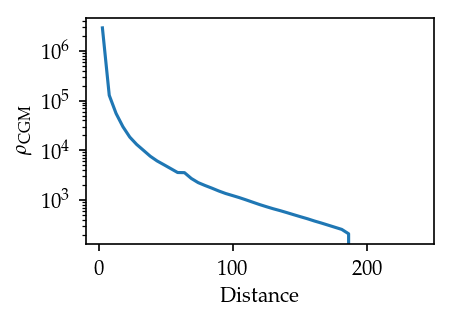

In [6]:
rbins = p['rbins']
density = p['density']
fig, ax = plt.subplots(1,1,dpi=150,figsize=(3,2))
ax.plot(rbins,density)
ax.set_ylabel(r'$\rho_{\mathrm{CGM}}$')
ax.set_xlabel('Distance')
ax.set_xlim(-10,250)
ax.semilogy()
plt.show()

Now, we compute $\rho_{\mathrm{CGM}}$ as the gas density from the profile above at the radial location of our satellite. We will also want to compute the velocity of the satellite to get the ram pressure $P_{\mathrm{ram}} = \rho_{\mathrm{CGM}} v_{\mathrm{sat}}^2$. 

In [7]:
i = 7
h1d = np.array([hd[1].properties['Xc'], hd[1].properties['Yc'], hd[1].properties['Zc']])

v = np.array([hd[i].properties['VXc'], hd[i].properties['VYc'], hd[i].properties['VZc']])

d = np.array([hd[i].properties['Xc'], hd[i].properties['Yc'], hd[i].properties['Zc']])
d = np.sqrt(np.sum((d - h1d)**2))

print('Distance from halo 1: %.2f kpc' % d)

pcgm = p['density'][np.argmin(abs(p['rbins']-d))]
Pram= pcgm * np.sum(v**2)
print('Ram pressure %.2e Msol kpc^-3 km^2 s^-2' % Pram)

Distance from halo 1: 43.91 kpc
Ram pressure 9.21e+08 Msol kpc^-3 km^2 s^-2


### Restoring force pressure

Great! Now that we have the ram pressure, we need to compute the restoring force pressure. We copy the exact definition used in Simpson et al (2018), where $P_{\mathrm{rest}} = | \frac{\partial \Phi}{\partial z} |_{\mathrm{max}} \Sigma_{\mathrm{max}}$, where $| \frac{\partial \Phi}{\partial z} |_{\mathrm{max}}$ is the maximum of the dierivative of the gravitational potential $\Phi$ along the direction of motion $z$ and $\Sigma_{\mathrm{max}}$ is the gas surface density. Simpson et al simplify by letting $\Sigma_{\mathrm{max}} = M_{\mathrm{gas}} / 2\pi R_{1/2}^2$ where $M_{\mathrm{gas}}$ is the total gas mass and $R_{1/2}$ is the radius that encloses 1/2 of this gas mass. They also let $| \frac{\partial \Phi}{\partial z} |_{\mathrm{max}} = v_{\mathrm{max}}^2 / r_{\mathrm{max}}$, so we do that as well. We start by making a gas profile for the satellite, to determine $R_{1/2}$. 

In [8]:
pynbody.analysis.angmom.faceon(h[i])
p = pynbody.analysis.profile.Profile(h[i].g,min=.01,max=hd[i].properties['Rvir'])
Mgas = np.sum(h[i].g['mass'])
percent_enc = p['mass_enc']/Mgas

/home/akinshol/anaconda3/envs/py37/lib/python3.7/site-packages/pynbody/array.py:865: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return self.base[self._reexpress_index(item)]


In [10]:
rhalf = np.min(p['rbins'][percent_enc > 0.5])
SigmaGas = Mgas / (2*np.pi*rhalf**2)

dphidz = hd[i].properties['Vmax']**2 / hd[i].properties['Rmax']
Prest = dphidz * SigmaGas

print('Restoring pressure %.2e Msol kpc^-3 km^2 s^-2' % Prest)

Restoring pressure 1.35e+09 Msol kpc^-3 km^2 s^-2


Now we can finally compute the ratio of $P_{\mathrm{ram}}$ to $P_{\mathrm{rest}}$, which tells us the ability of ram pressure to strip gas from the galaxy. 

In [11]:
print(f'P_ram / P_rest {Pram/Prest}')

P_ram / P_rest 0.682736365498821


In [16]:
i = 942
print(len(h[i].gas))
pynbody.analysis.angmom.faceon(h[i])
p = pynbody.analysis.profile.Profile(h[i].g,min=.01,max=hd[i].properties['Rvir'])
Mgas = np.sum(h[i].g['mass'])
percent_enc = p['mass_enc']/Mgas

0


Exception ignored in: <function SimArray.__del__ at 0x7f37d4f50b70>
Traceback (most recent call last):
  File "/home/akinshol/anaconda3/envs/py37/lib/python3.7/site-packages/pynbody/array.py", line 654, in __del__
    def __del__(self):
KeyboardInterrupt


In [ ]:
path= '/home/akinshol/Data/Sims/h329.cosmo50PLK.3072gst5HbwK1BH/h329.cosmo50PLK.3072gst5HbwK1BH.004096/'
snapshots = ['h329.cosmo50PLK.3072gst5HbwK1BH.004096']
# haloids dictionary defined the major progenitor branch back through all snapshots for each z=0 halo we are interest in
# read this as haloids[1] is the list containing the haloid of the major progenitors of halo 1
# so if we have three snapshots, snapshots = [4096, 2048, 1024] then we would have 
# haloids[1] = [1, 2, 5] --- i.e. in snapshot 2048 halo 1 was actually called halo 2, and in 1024 it was called halo 5
haloids = {
    1:   [1],
    9:   [9],
    31:  [31], 
    32:  [32], 
    40:  [40], 
    63:  [63], 
    99:  [99], 
    126: [126], 
    129: [129],
    135: [135],
    170: [170],
    444: [444],
    686: [686],
    942: [942],
    1418:[1418]
}

for snapshot, i, h1id in zip(snapshots, haloids[z0])
for z0halonum in list(haloids.keys()):
    for snapshot, i, h1id in zip(snapshots, haloids[z0halonum], haloids[1]):


        


Loaded snapshot h329.cosmo50PLK.3072gst5HbwK1BH.004096 
Made gas density profile for halo 1 (technically halo 1)
Distance from halo 1 (technically halo 1): 0.00 kpc
Ram pressure 4.97e+10 Msol kpc^-3 km^2 s^-2
Made gas density profile for satellite halo 1
Restoring pressure 1.07e+11 Msol kpc^-3 km^2 s^-2
P_ram / P_rest 0.4625894412146234
Loaded snapshot h329.cosmo50PLK.3072gst5HbwK1BH.004096 
Made gas density profile for halo 1 (technically halo 1)
Distance from halo 1 (technically halo 1): 44.07 kpc
Ram pressure 9.49e+08 Msol kpc^-3 km^2 s^-2
Made gas density profile for satellite halo 9
Restoring pressure 1.59e+09 Msol kpc^-3 km^2 s^-2
P_ram / P_rest 0.5972829917723382
Loaded snapshot h329.cosmo50PLK.3072gst5HbwK1BH.004096 


Exception ignored in: <function _wrap_fn.<locals>.q at 0x7f13bcc718c8>
Traceback (most recent call last):
  File "/home/akinshol/anaconda3/envs/py37/lib/python3.7/site-packages/pynbody/array.py", line 952, in q
    return w(SimArray(s), *y)
  File "/home/akinshol/anaconda3/envs/py37/lib/python3.7/site-packages/pynbody/array.py", line 198, in __new__
    sim = data.sim
  File "/home/akinshol/anaconda3/envs/py37/lib/python3.7/site-packages/pynbody/array.py", line 909, in sim
    return self.base.sim[self._ptr]
  File "/home/akinshol/anaconda3/envs/py37/lib/python3.7/site-packages/pynbody/snapshot/__init__.py", line 272, in __getitem__
    return IndexedSubSnap(self, i)
  File "/home/akinshol/anaconda3/envs/py37/lib/python3.7/site-packages/pynbody/snapshot/__init__.py", line 1877, in __init__
    new_slice = slice(ids.min(), ids.max() + 1)
  File "/home/akinshol/anaconda3/envs/py37/lib/python3.7/site-packages/numpy/core/_methods.py", line 28, in _amax
    return umr_maximum(a, axis, None,

Made gas density profile for halo 1 (technically halo 1)


In [5]:
path= '/home/christenc/Data/Sims/h329.cosmo50PLK.3072g/h329.cosmo50PLK.3072gst5HbwK1BH/snapshots/'
snapshots = ['h329.cosmo50PLK.3072gst5HbwK1BH.004096', 
             'h329.cosmo50PLK.3072gst5HbwK1BH.004032', 
             'h329.cosmo50PLK.3072gst5HbwK1BH.003936', 
             'h329.cosmo50PLK.3072gst5HbwK1BH.003840', 
             'h329.cosmo50PLK.3072gst5HbwK1BH.003744', 
             'h329.cosmo50PLK.3072gst5HbwK1BH.003648', 
             'h329.cosmo50PLK.3072gst5HbwK1BH.003606', 
             'h329.cosmo50PLK.3072gst5HbwK1BH.003552', 
             'h329.cosmo50PLK.3072gst5HbwK1BH.003456', 
             'h329.cosmo50PLK.3072gst5HbwK1BH.003360', 
             'h329.cosmo50PLK.3072gst5HbwK1BH.003264', 
             'h329.cosmo50PLK.3072gst5HbwK1BH.003195', 
             'h329.cosmo50PLK.3072gst5HbwK1BH.003168', 
             'h329.cosmo50PLK.3072gst5HbwK1BH.003072',
             'h329.cosmo50PLK.3072gst5HbwK1BH.002976', 
             'h329.cosmo50PLK.3072gst5HbwK1BH.002880', 
             'h329.cosmo50PLK.3072gst5HbwK1BH.002784', 
             'h329.cosmo50PLK.3072gst5HbwK1BH.002688', 
             'h329.cosmo50PLK.3072gst5HbwK1BH.002592', 
             'h329.cosmo50PLK.3072gst5HbwK1BH.002554', 
             'h329.cosmo50PLK.3072gst5HbwK1BH.002496', 
             'h329.cosmo50PLK.3072gst5HbwK1BH.002400', 
             'h329.cosmo50PLK.3072gst5HbwK1BH.002304',
             'h329.cosmo50PLK.3072gst5HbwK1BH.002208', 
             'h329.cosmo50PLK.3072gst5HbwK1BH.002112', 
             'h329.cosmo50PLK.3072gst5HbwK1BH.002088', 
             'h329.cosmo50PLK.3072gst5HbwK1BH.002016', 
             'h329.cosmo50PLK.3072gst5HbwK1BH.001920', 
             'h329.cosmo50PLK.3072gst5HbwK1BH.001824',
             'h329.cosmo50PLK.3072gst5HbwK1BH.001740',
             'h329.cosmo50PLK.3072gst5HbwK1BH.001728',
             'h329.cosmo50PLK.3072gst5HbwK1BH.001632', 
             'h329.cosmo50PLK.3072gst5HbwK1BH.001536', 
             'h329.cosmo50PLK.3072gst5HbwK1BH.001475', 
             'h329.cosmo50PLK.3072gst5HbwK1BH.001440', 
             'h329.cosmo50PLK.3072gst5HbwK1BH.001344', 
             'h329.cosmo50PLK.3072gst5HbwK1BH.001269', 
             'h329.cosmo50PLK.3072gst5HbwK1BH.001248',
             'h329.cosmo50PLK.3072gst5HbwK1BH.001152', 
             'h329.cosmo50PLK.3072gst5HbwK1BH.001106', 
             'h329.cosmo50PLK.3072gst5HbwK1BH.001056', 
             'h329.cosmo50PLK.3072gst5HbwK1BH.000974', 
             'h329.cosmo50PLK.3072gst5HbwK1BH.000960',
             'h329.cosmo50PLK.3072gst5HbwK1BH.000864', 
             'h329.cosmo50PLK.3072gst5HbwK1BH.000776', 
             'h329.cosmo50PLK.3072gst5HbwK1BH.000768', 
             'h329.cosmo50PLK.3072gst5HbwK1BH.000672', 
             'h329.cosmo50PLK.3072gst5HbwK1BH.000637', 
             'h329.cosmo50PLK.3072gst5HbwK1BH.000576', 
             'h329.cosmo50PLK.3072gst5HbwK1BH.000480', 
             'h329.cosmo50PLK.3072gst5HbwK1BH.000456', 
             'h329.cosmo50PLK.3072gst5HbwK1BH.000384', 
             'h329.cosmo50PLK.3072gst5HbwK1BH.000347', 
             'h329.cosmo50PLK.3072gst5HbwK1BH.000288', 
             'h329.cosmo50PLK.3072gst5HbwK1BH.000275', 
             'h329.cosmo50PLK.3072gst5HbwK1BH.000225', 
             'h329.cosmo50PLK.3072gst5HbwK1BH.000192', 
             'h329.cosmo50PLK.3072gst5HbwK1BH.000188', 
             'h329.cosmo50PLK.3072gst5HbwK1BH.000139', 
             'h329.cosmo50PLK.3072gst5HbwK1BH.000107', 
             'h329.cosmo50PLK.3072gst5HbwK1BH.000096', 
             'h329.cosmo50PLK.3072gst5HbwK1BH.000071']

# haloids dictionary defines the major progenitor branch back through all snapshots for each z=0 halo we are 
# interest in ... read this as haloids[1] is the list containing the haloid of the major progenitors of halo 1
# so if we have three snapshots, snapshots = [4096, 2048, 1024] then we would have haloids[1] = [1, 2, 5] 
# --- i.e. in snapshot 2048 halo 1 was actually called halo 2, and in 1024 it was called halo 5
haloids = {
    1: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 5, 19, 18, 11],
    7: [7, 6, 6, 6, 6, 5, 5, 4, 4, 4, 4, 2, 5, 5, 5, 6, 6, 6, 7, 6, 7, 7, 8, 7, 6, 6, 6, 6, 5, 4, 5, 5, 6, 5, 6, 
        6, 8, 8, 9, 10, 8, 9, 9, 10, 11, 10, 14, 14, 14, 16, 17, 23, 22, 22, 24, 30, 25, 24],
    10: [10, 10, 9, 9, 9, 9, 9, 9, 11, 11, 11, 3, 13, 13, 13, 14, 14, 14, 15, 14, 16, 15, 16, 15, 15, 15, 14, 14, 
         13, 7, 13, 14, 14, 16, 16, 16, 19, 20, 22, 20, 19, 19, 19, 18, 19, 16, 24, 27, 34, 42, 44, 60, 71],
    13: [13, 13, 13, 13, 13, 13, 13, 16, 16, 15, 15, 5, 16, 16, 16, 17, 18, 18, 17, 16, 18, 17, 18, 17, 17, 17, 17, 
         15, 16, 8, 18, 22, 24, 26, 26, 28, 25, 26, 27, 28, 24, 24, 25, 35, 38, 29, 44, 36, 54, 60, 61],
    15: [15, 15, 15, 15, 15, 15, 16, 17, 17, 16, 17, 6, 17, 17, 17, 20, 20, 19, 22, 21, 23, 22, 22, 22, 23, 23, 23, 
         24, 25, 13, 25, 24, 23, 25, 25, 29, 33, 31, 36, 35, 37, 37, 37, 37, 37, 28, 40, 31, 41, 59],
    19: [19, 19, 18, 18, 17, 18, 18, 19, 18, 17, 16, 7, 18, 19, 28, 31, 33, 34, 34, 33, 35, 33, 34, 31, 31, 32, 33, 
         35, 35, 16, 36, 34],
    27: [27, 29, 29, 27, 27, 27, 27, 28, 29, 28, 29, 9, 30, 32, 31, 32, 31, 32, 32, 31, 32, 32, 42, 30, 30, 31, 30, 
         33, 32, 15, 34, 42, 39, 44, 43, 43, 47, 48, 52, 49, 48, 59, 62, 62, 61, 38],
    29: [29, 27, 23, 21, 18, 17, 15, 14, 13, 12, 12, 4, 12, 12, 12, 13, 12, 12, 12, 11, 13, 12, 14, 13, 12, 12, 11, 
         11, 11, 5, 11, 10, 11, 10, 9, 9, 20, 22, 26, 27, 25, 39, 39, 39, 42, 30, 48, 39, 50, 50, 49, 66, 68, 74, 
         77, 97, 89],
    31: [31, 31, 27, 25, 25, 25, 24, 25, 25, 24, 25, 8, 26, 28, 26, 27, 27, 28, 29, 27, 29, 28, 29, 28, 29, 30, 29, 
         28, 28, 14, 29, 28, 28, 30, 29, 30, 30, 28, 30, 31, 27, 23, 23, 25, 27, 23, 42, 34, 40, 45, 43, 39, 80, 90, 
         89, 78, 66, 65],
    32: [32, 32, 32, 32, 32, 34, 34, 35, 34, 33, 32, 30, 31, 31, 27, 19, 17, 16, 25, 29, 15, 13, 13, 12, 11, 11, 12, 
         13, 12, 12, 12, 11, 13, 13, 13, 14, 14, 15, 14, 13, 14, 15, 15, 14, 17, 14, 19, 21, 55],
    49: [49, 50, 50, 50, 51, 52, 51, 56, 56, 56, 58, 13, 60, 64, 61, 61, 62, 60, 59, 57, 60, 59, 59, 59, 59, 60],
    55: [55, 56, 54, 54, 55, 55, 55, 55, 51, 48, 49, 12, 49, 48, 46, 43, 44, 44, 41, 41, 42, 42, 41, 42, 40, 41, 39, 
         41, 39, 17, 40, 44, 44, 43, 41, 41, 46, 46, 48, 46, 43, 42, 41, 45, 53, 34, 53, 42, 64, 159, 158, 171, 169,
         191, 193, 148, 106, 105],
    91: [91, 91, 93, 93, 92, 92, 90, 89, 91, 97, 110, 18, 137, 152, 125, 111, 111, 113, 111, 107, 111, 107, 110, 109, 
         111, 113],
    94: [94, 96, 97, 99, 99, 101, 101, 100, 101, 104, 102, 15, 101, 99, 92, 103, 120, 118, 101, 97, 90, 85, 85, 110, 
         84, 84, 69, 71, 70, 20, 74, 73, 72, 70, 69, 62, 57, 50, 42, 39, 36, 30, 31, 33, 36, 27, 41, 32, 44, 52, 52, 
         56, 49, 54, 54, 52, 71, 73],
    116: [116, 118, 119, 123, 121, 122, 119, 116, 114, 113, 111, 16, 105, 102, 100, 96, 92, 92, 91, 84, 86, 87, 84, 
          82, 80, 81, 79, 70, 62, 19, 55, 51, 43, 37, 34, 34, 34, 30, 32, 29, 28, 25, 26, 21, 28, 22, 30, 30, 33, 
          35],
    119: [119, 123, 124, 129, 126, 126, 126, 127, 130, 131, 133, 19, 135, 136, 131, 130, 122, 104, 76, 66],
    131: [131, 136, 133, 138, 138, 137, 138, 137, 139, 142, 143, 20, 146, 149, 147, 151, 150, 150, 151, 150, 149, 
          148, 152, 152, 155, 158, 159, 158, 157, 26, 170, 168, 168, 163, 160, 167, 171, 172, 172, 175, 170, 178, 
          176, 170, 173, 47, 169, 55, 180, 176, 171, 164, 163, 165, 163, 136, 130, 123, 71, 42, 34, 9],
    132: [132, 119, 107, 106, 113, 151, 168, 160, 111, 83, 71, 14, 64, 58, 52, 53, 56],
    154: [154, 154, 152, 156, 151, 162, 149, 150, 149, 150, 146, 21, 149, 150, 146, 147, 144, 139, 135, 131, 126, 
          112, 108, 96, 85, 88, 89, 88, 80, 22, 79, 79, 70, 67, 66, 58, 49, 49, 51, 58, 53, 51, 50, 55, 60, 37, 
          67, 44, 69, 68, 71, 70, 70, 76, 74, 73, 72, 69],
    443: [443, 435, 416, 375, 336, 309, 455, 336, 156, 73, 48]
}



In [11]:
age = []
for i in list(haloids.keys()):
    s = pynbody.load(path+snapshots[0])
    h = s.halos()
    age_youngest = np.min(np.array(h[i].star['age'].in_units('Gyr'), dtype=float))
    age.append(age_youngest)

In [12]:
print(age)

[3.4626737464278104e-05, 0.004243872923156996, 0.009294470504925491, 0.00592657571530855, 0.012661120691885516, 0.08168553944183597, 0.1338742180516725, 2.2264806722454997, 10.279564237724104, 5.0817186490677715, 0.0328635110189595, 13.143219773465768, 1.0252947344125565, 11.876376378220499, 9.986633000638838, 8.872989302186783, 13.325880887583024, 0.024446263250230978, 13.087663822367643, 3.18776695875241]


In [13]:
print(list(haloids.keys()))

[1, 7, 10, 13, 15, 19, 27, 29, 31, 32, 49, 55, 91, 94, 116, 119, 131, 132, 154, 443]


In [43]:
z0halonum = 32 #aka z0halonum

Prests, Prams, times, dist, gasfrac = [],[],[],[],[]

for tstep in range(len(haloids[z0halonum])):
    snapshot = snapshots[tstep]
    h1id = haloids[1][tstep]
    

    s = pynbody.load(path+snapshot)
    s.physical_units()
    h = s.halos()
    hd = s.halos(dummy=True)
    t = float(hd[i].properties['time'].in_units('Gyr'))
    print(f'Loaded snapshot {snapshot}, {13.800797497330507 - t} Gyr ago')
        
    h1d = np.array([hd[h1id].properties['Xc'], hd[h1id].properties['Yc'], hd[h1id].properties['Zc']])
    h1r = hd[h1id].properties['Rvir']
    
    #print('\t Now tracing ram pressure history of (z=0) halo %s' % z0halonum)
    
    i = haloids[z0halonum][tstep]
    print('\t Major progenitor halod ID:', i)

    v = np.array([hd[i].properties['VXc'], hd[i].properties['VYc'], hd[i].properties['VZc']])

    d = np.array([hd[i].properties['Xc'], hd[i].properties['Yc'], hd[i].properties['Zc']])
    d = np.sqrt(np.sum((d - h1d)**2))

    print('\t Distance from halo 1 (technically halo %s): %.2f kpc or %.2f Rvir' % (h1id,d,d/h1r))
    
    # calculate CGM density and velocity to get ram pressure
    h1rvir = hd[h1id].properties['Rvir']
    pynbody.analysis.angmom.faceon(h[h1id])
    p = pynbody.analysis.profile.Profile(s.g,min=.01,max=10*h1rvir, ndim=3)
    print('\t Made gas density profile for halo 1 (technically halo %s)' % h1id)
    rbins = p['rbins']
    density = p['density']

    pcgm = density[np.argmin(abs(rbins-d))]
    Pram= pcgm * np.sum(v**2)
    print('\t Ram pressure %.2e Msol kpc^-3 km^2 s^-2' % Pram)

    # calculate restoring force pressure
    if len(h[i].gas) < 30:
        print('\t No gas, skipping restoring force calculation')
        Prest = None
    else:
        print('\t # of gas particles:',len(h[i].gas))
        pynbody.analysis.angmom.faceon(h[i])
        p = pynbody.analysis.profile.Profile(h[i].g,min=.01,max=hd[i].properties['Rvir'])
        print('\t Made gas density profile for satellite halo %s' % i)
        Mgas = np.sum(h[i].g['mass'])
        percent_enc = p['mass_enc']/Mgas

        rhalf = np.min(p['rbins'][percent_enc > 0.5])
        SigmaGas = Mgas / (2*np.pi*rhalf**2)

        dphidz = hd[i].properties['Vmax']**2 / hd[i].properties['Rmax']
        Prest = dphidz * SigmaGas

        print('\t Restoring pressure %.2e Msol kpc^-3 km^2 s^-2' % Prest)

        print(f'\t P_ram / P_rest {Pram/Prest}')
        
    Prests.append(Prest)
    Prams.append(Pram)
    times.append(t)
    dist.append(d/h1r)
    if hd[i].properties['M_star'] != 0:
        gasfrac.append(hd[i].properties['M_gas']/(hd[i].properties['M_gas']+hd[i].properties['M_star']))
    else:
        gasfrac.append(None)

Loaded snapshot h329.cosmo50PLK.3072gst5HbwK1BH.004096, 0.0 Gyr ago
	 Major progenitor halod ID: 32
	 Distance from halo 1 (technically halo 1): 387.91 kpc or 3.04 Rvir
	 Made gas density profile for halo 1 (technically halo 1)
	 Ram pressure 6.69e+05 Msol kpc^-3 km^2 s^-2
	 No gas, skipping restoring force calculation
Loaded snapshot h329.cosmo50PLK.3072gst5HbwK1BH.004032, 0.21549019020639903 Gyr ago
	 Major progenitor halod ID: 32
	 Distance from halo 1 (technically halo 1): 384.44 kpc or 2.99 Rvir
	 Made gas density profile for halo 1 (technically halo 1)
	 Ram pressure 7.16e+05 Msol kpc^-3 km^2 s^-2
	 No gas, skipping restoring force calculation
Loaded snapshot h329.cosmo50PLK.3072gst5HbwK1BH.003936, 0.5387254755160633 Gyr ago
	 Major progenitor halod ID: 32
	 Distance from halo 1 (technically halo 1): 377.86 kpc or 2.90 Rvir
	 Made gas density profile for halo 1 (technically halo 1)
	 Ram pressure 7.61e+05 Msol kpc^-3 km^2 s^-2
	 No gas, skipping restoring force calculation
Loaded

/home/akinshol/anaconda3/envs/py37/lib/python3.7/site-packages/pynbody/array.py:865: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return self.base[self._reexpress_index(item)]


	 Made gas density profile for satellite halo 32
	 Restoring pressure 2.02e+05 Msol kpc^-3 km^2 s^-2
	 P_ram / P_rest 6.172989497186069
Loaded snapshot h329.cosmo50PLK.3072gst5HbwK1BH.003195, 3.0336978340953085 Gyr ago
	 Major progenitor halod ID: 30
	 Distance from halo 1 (technically halo 1): 263.03 kpc or 1.83 Rvir
	 Made gas density profile for halo 1 (technically halo 1)
	 Ram pressure 1.30e+06 Msol kpc^-3 km^2 s^-2
	 # of gas particles: 73
	 Made gas density profile for satellite halo 30
	 Restoring pressure 1.37e+06 Msol kpc^-3 km^2 s^-2
	 P_ram / P_rest 0.9474399118395453
Loaded snapshot h329.cosmo50PLK.3072gst5HbwK1BH.003168, 3.1246077580886293 Gyr ago
	 Major progenitor halod ID: 31
	 Distance from halo 1 (technically halo 1): 255.17 kpc or 1.77 Rvir
	 Made gas density profile for halo 1 (technically halo 1)
	 Ram pressure 1.47e+06 Msol kpc^-3 km^2 s^-2
	 # of gas particles: 91
	 Made gas density profile for satellite halo 31
	 Restoring pressure 2.07e+06 Msol kpc^-3 km^2 s^-

In [40]:
print(len(times),times)
print(len(Prams),Prams)
print(len(Prests),Prests)
print(len(dist),dist)
print(len(gasfrac),gasfrac)

49 [13.800797497330507, 13.585307307124108, 13.262072021814443, 12.9388367365049, 12.61560145119169, 12.292366165879884, 12.150950728556824, 11.969130880562966, 11.645895595235446, 11.322660309861027, 10.999425024551469, 10.767099663235198, 10.676189739241877, 10.352954453932039, 10.02971916862246, 9.706483883312892, 9.383248598003325, 9.060013312693755, 8.736778027384183, 8.608830726949147, 8.413542742075784, 8.090307456765835, 7.7670721714559985, 7.443836886146237, 7.120601600836549, 7.039792779509132, 6.797366315526901, 6.474131030217272, 6.150895744907672, 5.868064870261778, 5.827660459598084, 5.5044251742885, 5.181189888976207, 4.975800801418971, 4.857954603639868, 4.534719318304801, 4.282191751634722, 4.211484032967021, 3.88824874762909, 3.7333651734046907, 3.5650134622911636, 3.2889166560650542, 3.241778176953274, 2.918542891615271, 2.622243880055636, 2.595307606277478, 2.272072320939971, 2.1542261231604445, 1.9488370356022409]
49 [668951.2328459364, 715929.4040721358, 760606.23

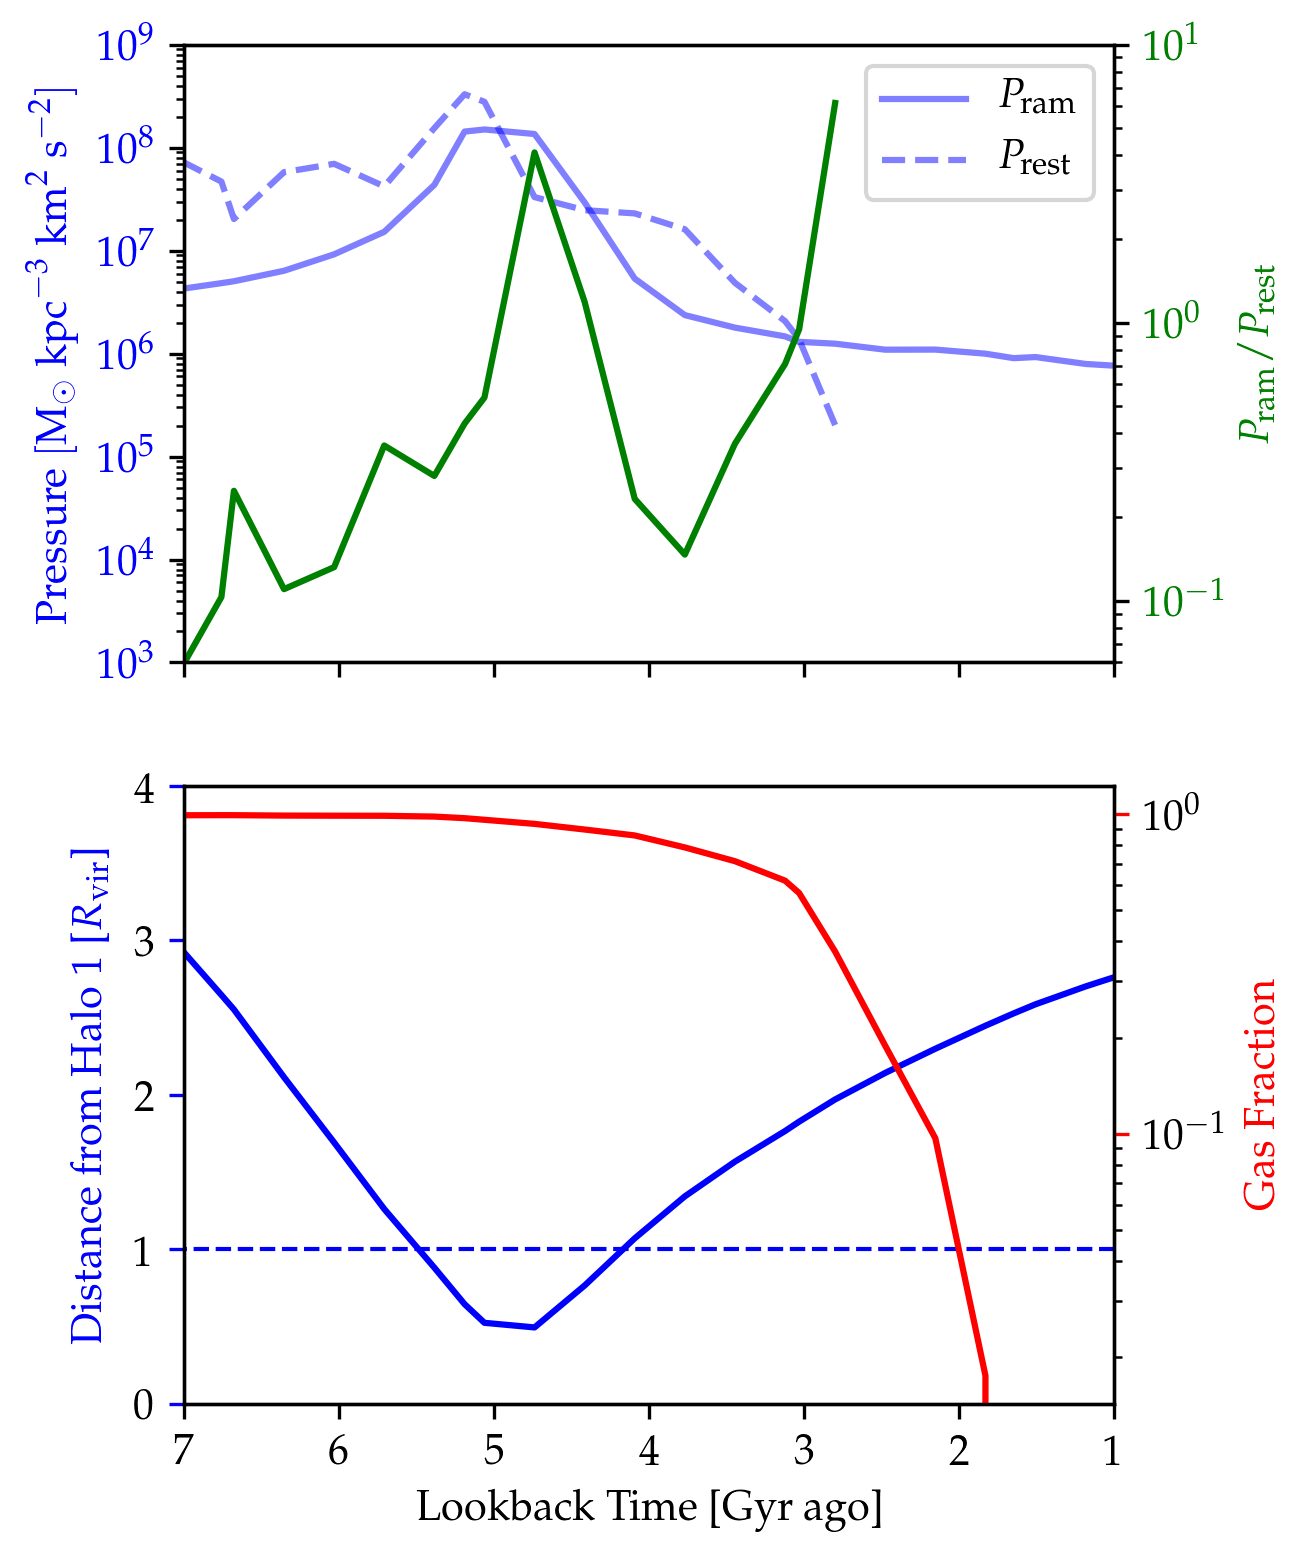

In [60]:
# time = np.array([0.25,0.33,0.37,0.48,0.64,0.66,0.77,0.94,0.98,1.18,1.30,1.54,1.63,1.95,2.15,2.27,2.60,2.62,
#         2.92,3.24,3.29,3.57,3.73,3.89,4.21,4.28,4.53,4.86,4.98,5.18,5.50,5.83,5.87,6.15,6.47,6.80,
#         7.04,7.12,7.44,7.77,8.09,8.41,8.61,8.74,9.06,9.38,9.71,10.03,10.35,10.68,10.77,11.00,11.32,
#         11.65,11.97,12.15,12.29,12.62,12.94,13.26,13.59,13.80])

age = 13.800797497330507

time = age - np.array(times)
Prams = np.array(Prams)
Prests = np.array(Prests)


fig, ax = plt.subplots(2, 1, figsize=(4,6), dpi=300, sharex=True)

ax[0].plot(time,Prams,  color='b', label=r'$P_{\mathrm{ram}}$',  alpha=0.5)
ax[0].plot(time,Prests, color='b', label=r'$P_{\mathrm{rest}}$', alpha=0.5, linestyle='--')
ax[0].semilogy()
ax[0].set_ylabel('Pressure $[\mathrm{M}_{\odot}\ \mathrm{kpc}^{-3}\ \mathrm{km}^2\ \mathrm{s}^{-2}]$', color='b')
ax[0].tick_params(axis='y', labelcolor='b')
ax[0].legend()
ax[1].invert_xaxis()
ax[1].set_xlabel('Lookback Time [Gyr ago]')
ax[1].set_xlim(7,1)
ax[0].set_ylim(1e3, 1e9)

ax2 = ax[0].twinx()
ratio = []
for Pram,Prest in zip(Prams,Prests):
    if Prest!=None:
        ratio.append(Pram/Prest)
    else:
        ratio.append(Prest)
        
ax2.plot(time,ratio, color='g')
ax2.set_ylabel(r'$P_{\mathrm{ram}} / P_{\mathrm{rest}}$', color='g')
ax2.tick_params(axis='y', labelcolor='g')
ax2.semilogy()
ax2.set_ylim(6e-2,1e1)

ax[1].plot(time,dist,color='b')
ax[1].plot([np.min(time),np.max(time)],[1, 1], 'b--', linewidth=1)
ax[1].set_ylabel(r'Distance from Halo 1 [$R_{\mathrm{vir}}$]', color='b')
ax[1].tick_params(axis='y', color='b')
ax[1].set_ylim(0, 4)

ax3 = ax[1].twinx()
ax3.plot(time,gasfrac, color='r')
ax3.set_ylabel(r'Gas Fraction', color='r')
ax3.tick_params(axis='y', color='r')
ax3.semilogy()
plt.savefig('rampressure.png', dpi=300)
plt.show()


In [65]:
# time = np.array([0.25,0.33,0.37,0.48,0.64,0.66,0.77,0.94,0.98,1.18,1.30,1.54,1.63,1.95,2.15,2.27,2.60,2.62,
#         2.92,3.24,3.29,3.57,3.73,3.89,4.21,4.28,4.53,4.86,4.98,5.18,5.50,5.83,5.87,6.15,6.47,6.80,
#         7.04,7.12,7.44,7.77,8.09,8.41,8.61,8.74,9.06,9.38,9.71,10.03,10.35,10.68,10.77,11.00,11.32,
#         11.65,11.97,12.15,12.29,12.62,12.94,13.26,13.59,13.80])

s = pynbody.load('/home/akinshol/Data/Sims/newh329/'+snapshots[0])
h = s.halos()
sfh, bins = pynbody.plot.stars.sfh(h[32], bins=128)
bincenters = 0.5*(bins[1:]+bins[:-1])

print(len(sfh))
print(len(bins))

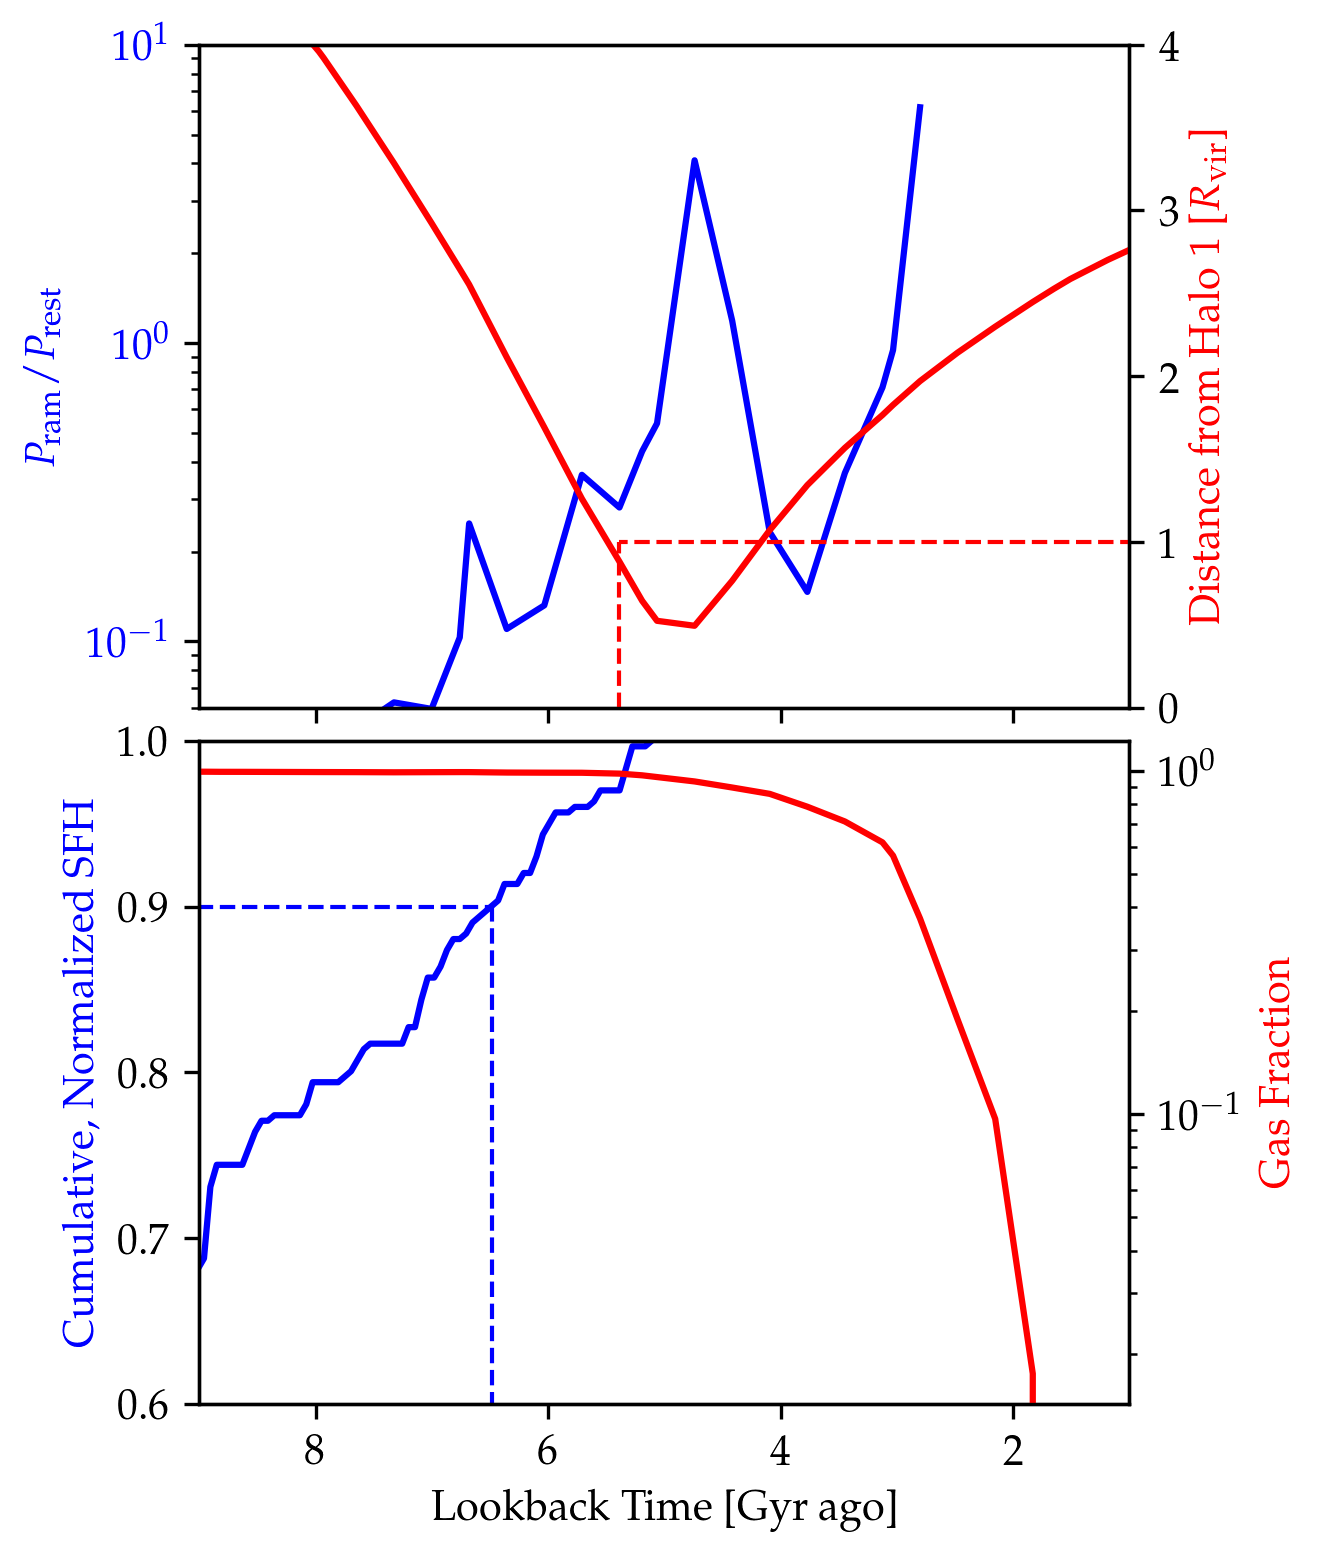

In [81]:
age = 13.800797497330507

time = age - np.array(times)
Prams = np.array(Prams)
Prests = np.array(Prests)


fig, ax = plt.subplots(2, 1, figsize=(4,6), dpi=300, sharex=True)


ratio = []
for Pram,Prest in zip(Prams,Prests):
    if Prest!=None:
        ratio.append(Pram/Prest)
    else:
        ratio.append(Prest)
ax[0].plot(time,ratio, color='b')
ax[0].set_ylabel(r'$P_{\mathrm{ram}} / P_{\mathrm{rest}}$', color='b')
ax[0].tick_params(axis='y', labelcolor='b')
ax[0].semilogy()
ax[0].set_ylim(6e-2,1e1)

ax2 = ax[0].twinx()
dist = np.array(dist)
ax2.plot(time,dist,color='r')
ax2.plot([np.min(time),np.max(time[dist<1])],[1, 1], 'r--', linewidth=1)
ax2.plot([np.max(time[dist<1]),np.max(time[dist<1])], [0,1], 'r--', linewidth=1)
ax2.set_ylabel(r'Distance from Halo 1 [$R_{\mathrm{vir}}$]', color='r')
ax2.set_ylim(0, 4)

c_sfh = np.empty(shape=sfh.shape)
sfhmstar = np.sum(sfh)
for i in range(len(bincenters)):
    c_sfh[i] = np.sum(sfh[:i+1])/sfhmstar
    
    
ax[1].plot(age - bincenters,c_sfh,color='b')
ax[1].set_ylabel(r'Cumulative, Normalized SFH', color='blue')
ax[1].set_ylim(0.6,1.0)
ax[1].plot([np.max(age-bincenters), np.max(age-bincenters[c_sfh > 0.9])], [0.9,0.9], 
           c='b', linewidth=1, linestyle='--')
ax[1].plot([np.max(age-bincenters[c_sfh > 0.9]),np.max(age-bincenters[c_sfh > 0.9])], [0.5, 0.9], 
           c='b', linewidth=1, linestyle='--')

ax[1].invert_xaxis()
ax[1].set_xlabel('Lookback Time [Gyr ago]')
ax[1].set_xlim(9,1)


ax3 = ax[1].twinx()
ax3.plot(time,gasfrac, color='r')
ax3.set_ylabel(r'Gas Fraction', color='r')
ax3.semilogy()
plt.subplots_adjust(hspace=0.05)
plt.savefig('rampressure.png', dpi=300)
plt.show()

In [54]:
import pickle
with open('h329_timesteps.data','wb') as f:
    for t, pram, prest, d, gf, r, hid in zip(time, Prams, Prests, dist, gasfrac, ratio, haloids[32]):
        pickle.dump({
            'time': t, 
            'Pram': pram, 
            'Prest': prest,
            'h1dist': d, 
            'gasfrac':gf, 
            'ratio':r,
            'haloid': hid
        }, f, protocol=2)

In [55]:
import pandas
data = []
with open('h329_timesteps.data','rb') as f:
    while True:
        try: 
            data.append(pickle.load(f,encoding='latin1'))
        except EOFError:
            break
data = pd.DataFrame(data)

In [56]:
data

,Pram,Prest,gasfrac,h1dist,haloid,ratio,time
0,6.689512e+05,None,0.000000,3.043136,32,NaN,0.000000
1,7.159294e+05,None,0.000000,2.989642,32,NaN,0.215490
2,7.606062e+05,None,0.000000,2.896403,32,NaN,0.538725
3,7.414754e+05,None,0.000000,2.807108,32,NaN,0.861961
4,7.936887e+05,None,0.000000,2.702395,32,NaN,1.185196
5,9.259252e+05,None,0.000000,2.586716,34,NaN,1.508431
6,9.038461e+05,None,0.000000,2.527661,34,NaN,1.649847
7,9.986865e+05,None,0.017516,2.447941,35,NaN,1.831667
8,1.094286e+06,None,0.096792,2.298870,34,NaN,2.154902
9,1.092109e+06,None,0.188416,2.142346,33,NaN,2.478137


In [13]:
for i in range(len(snapshots)):
    snapshot = snapshots[i]
    hids = [value[i] for value in list(haloids.values())]
    h1id = h1ids[i]
    z0halonums = list(haloids.keys())
    print(hids,z0halonums)
    
    
    s = pynbody.load(path+snapshot)
    s.physical_units()
    h = s.halos()
    hd = s.halos(dummy=True)
    print('Loaded snapshot %s ' % snapshot)
        
    # calculate CGM density and velocity to get ram pressure
    h1rvir = hd[h1id].properties['Rvir']
    pynbody.analysis.angmom.faceon(h[h1id])
    p = pynbody.analysis.profile.Profile(h[h1id].g,min=.01,max=4*h1rvir, ndim=3)
    print('\t Made gas density profile for halo 1 (technically halo %s)' % h1id)
    rbins = p['rbins']
    density = p['density']
    h1d = np.array([hd[h1id].properties['Xc'], hd[h1id].properties['Yc'], hd[h1id].properties['Zc']])
    
    for z0halonum, i in zip(z0halonums, hids):
        print('\t Now tracing ram pressure history of (z=0) halo %s' % z0halonum)
        
        v = np.array([hd[i].properties['VXc'], hd[i].properties['VYc'], hd[i].properties['VZc']])

        d = np.array([hd[i].properties['Xc'], hd[i].properties['Yc'], hd[i].properties['Zc']])
        d = np.sqrt(np.sum((d - h1d)**2))
        
        print('\t\t Distance from halo 1 (technically halo %s): %.2f kpc' % (h1id,d))

        pcgm = density[np.argmin(abs(rbins-d))]
        Pram= pcgm * np.sum(v**2)
        print('\t\t Ram pressure %.2e Msol kpc^-3 km^2 s^-2' % Pram)
        
        # calculate restoring force pressure
        if len(h[i].gas)==0:
            print('No gas, skipping restoring force calculation')
            Prest = None
        else:
            pynbody.analysis.angmom.faceon(h[i])
            p = pynbody.analysis.profile.Profile(h[i].g,min=.01,max=hd[i].properties['Rvir'])
            print('\t\t Made gas density profile for satellite halo %s' % i)
            Mgas = np.sum(h[i].g['mass'])
            percent_enc = p['mass_enc']/Mgas

            rhalf = np.min(p['rbins'][percent_enc > 0.5])
            SigmaGas = Mgas / (2*np.pi*rhalf**2)

            dphidz = hd[i].properties['Vmax']**2 / hd[i].properties['Rmax']
            Prest = dphidz * SigmaGas

            print('\t\t Restoring pressure %.2e Msol kpc^-3 km^2 s^-2' % Prest)

            print(f'\t\t P_ram / P_rest {Pram/Prest}')

AssertionError: 

In [4]:
s = pynbody.load(path+snapshots[0])
h = s.halos()
h[7].gas['hydrogen']

SimArray([0.76130906, 0.76132298, 0.75904736, ..., 0.7591716 , 0.75990433,
          0.75468865])